# Tarea 3 | Aprendizaje Estadístico y Computacional
---
#### Luciano Davico
#### Richard Orellana

---

Importamos los datos

In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_excel('BBDD_post_pabellon.xlsx')
df.head()

/home/luciano/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,53,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
3,65,NO,NO,4.3,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,2,0
4,62,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,SI,4,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    object 
 5   VOLUMEN PROSTATICO                                                         568 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

### 1. Descomposición 70:30 en datos de entrenamiento y test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
target = 'HOSPITALIZACION'

Vemos la distribución del target

In [22]:
df.groupby(target)[target].count()

HOSPITALIZACION
NO    544
SI     24
Name: HOSPITALIZACION, dtype: int64

Sampleamos los datos SI y NO como 1 y 0 respectivamente, para efectos de uso computacional

In [23]:
df[target] = df[target].apply(lambda x: 1 if x == 'SI' else 0)
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,1,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,1,5,0
2,53,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",1,3,0
3,65,NO,NO,4.3,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,1,2,0
4,62,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,3,SI,NO,NO,NO,NO,1,4,0


Mapeamos los datos categóricos a numéricos, utilizando LabelEncoder de scikit learn. Acá solo debemos tener en consideración que el modelo podría no ser preciso respecto al entendimiento semántico de las variables, al asignar arbitrariamente valor numéricos a datos que no sean ordinales.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
categorical_features = ['DIABETES', 
                        'HOSPITALIZACIÓN ULTIMO MES',
                        'BIOPSIAS PREVIAS',
                        'VOLUMEN PROSTATICO',
                        'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
                        'CUP',
                        'ENF. CRONICA PULMONAR OBSTRUCTIVA',
                        'BIOPSIA',
                        'FIEBRE',
                        'ITU',
                        'TIPO DE CULTIVO',
                        'AGENTE AISLADO',
                        'PATRON DE RESISTENCIA',
                        ]

In [26]:
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,0,0,4.0,0,1,1,12,0,0,9,1,1,0,2,1,2,1,2,0
1,56,0,0,7.7,0,1,1,12,0,0,9,1,1,0,2,1,2,1,5,0
2,53,0,0,7.0,0,1,1,12,0,0,9,2,1,1,3,0,3,1,3,0
3,65,0,0,4.3,0,0,1,12,0,0,9,3,1,0,2,1,2,1,2,0
4,62,0,0,7.0,0,1,1,12,0,0,9,3,1,0,2,1,2,1,4,0


Limpiamos un poco más nuestro dataset.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    int64  
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    int64  
 5   VOLUMEN PROSTATICO                                                         568 non-null    int64  
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [28]:
n_days_post_biopsia_name = 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
df[n_days_post_biopsia_name] = df[n_days_post_biopsia_name].apply(lambda x: 0 if x == 'NO' else x)
df[n_days_post_biopsia_name].unique()

array([1, 2, 3, 5, 9, 0])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    int64  
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    int64  
 5   VOLUMEN PROSTATICO                                                         568 non-null    int64  
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Descomponemos en 70:30

In [30]:
y = df[target]
X = df.drop(columns=[target])

In [31]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [32]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,0,0,4.0,0,1,1,12,0,0,9,1,1,0,2,1,2,1,2,0
1,56,0,0,7.7,0,1,1,12,0,0,9,1,1,0,2,1,2,1,5,0
2,53,0,0,7.0,0,1,1,12,0,0,9,2,1,1,3,0,3,1,3,0
3,65,0,0,4.3,0,0,1,12,0,0,9,3,1,0,2,1,2,1,2,0
4,62,0,0,7.0,0,1,1,12,0,0,9,3,1,0,2,1,2,1,4,0


### 2. Selección de medida de desempeño, validación cruzada y tres técnicas de clasificación

Dado una distribución del target en el cual tenemos 544 casos en que no hay hospitalización, lo cual es un 95 % de los casos y 24 casos en los cuales sí hay hospitalización (5 %) sería adecuado enfocarnos en crear un modelo con una buena medida de desempeño para la clase minoritaria, la cual implicaría hospitalización y, en dicho caso, si no somos buenos clasificando este caso, el costo pudiera ser muy alto, como lo sería una vida humana. Dicho lo anterior, consideraremos el **f1-score** como una buena medida de desempeño. 

Respecto a Cross Validation, dado que no estamos ante una base de datos relativamente pequeña, es más aconsejable utilizar una **validación cruzada con 10 particiones** para poder obtener una buena generalización al entrenar y validar, además de que siendo un dataset pequeño el costo computacional de realizarlo no es elevado en recursos.

Las técnicas de clasificación que utilizaremos son: **Support Vector Machine**, **Random Forest** y **Naive Bayes**.
Seleccionamos Random Forest como uno de los modelos interesantes a utilizar dado que tiene un enfoque basado en árboles y suele ser robusto ante el overfitting, además de ser robusto en casos que no tengamos un gran volumen de datos. También, seleccionamos Naive Bayes ya que suele tener un buen rendimiento al tener muchos predictores, debido al supuesto de independencia entre dichos predictores, lo cual genera que ante datasets de pocos predictores, el asumir independencia genere que el modelo sea poco preciso.

### 3. Validación cruzada y comparación de modelos

Definimos funciones para la validacion cruzada y el entrenamiento de modelos

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
def cross_validation(estimator, X, y, scoring_metric, K=10):
    score = cross_val_score(estimator=estimator, X=X, y=y, cv=K, scoring=scoring_metric)
    return np.mean(score)

Definimos los estimadores. Utilizaremos un kernel lineal para el Support Vector Machine y 100 árboles para Random Forest.

In [35]:
clf_svm = SVC(kernel='linear', C=1)
clf_nb = GaussianNB()
clf_rf = RandomForestClassifier(n_estimators=100)

Definimos la medida de desempeño y la cantidad de particiones a utilizar para la validación cruzada.

In [36]:
score_metric = 'f1' # F1-Score
K = 10

Aplicamos validación cruzada.

In [37]:
clfs = {
    clf_svm: cross_validation(clf_svm, X_train, y_train, score_metric, K),
    clf_nb: cross_validation(clf_nb, X_train, y_train, score_metric, K),
    clf_rf: cross_validation(clf_rf, X_train, y_train, score_metric, K)
}
clfs

{SVC(C=1, kernel='linear'): 0.8666666666666666,
 GaussianNB(): 0.9133333333333333,
 RandomForestClassifier(): 1.0}

Observamos que el método con mejor valor de `f1-score` es `Random Forest`, el cual es 1.0. Podríamos estar ante un caso de overfitting, dado que el modelo obtiene una buena clasificación de los datos de entrenamiento pero su generalización es pobre ante nuevos datos. Podemos solucionar lo anterior probando al disminuir la cantidad de árboles utilizados por `RandomForest`

In [38]:
clf_rf_50t = RandomForestClassifier(n_estimators=50)
cross_validation(clf_rf_50t, X_train, y_train, score_metric, K)

1.0

Obtenemos el mismo valor. Tomamos este modelo como el mejor clasificador por el momento.

### 4. Técnicas de Undersampling

Trataremos el set de entrenamiento con dos técnicas de `undersampling` vistas en clases, las cuales son eliminación de datos aleatoria y ENN.

Debemos forzar a tener la versión `scikit-learn==1.2.1` para que funcione la librería que utilizaremos, la cual es `imblearn`

In [39]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /home/luciano/.local/lib/python3.8/site-packages
Requires: scipy, numpy, threadpoolctl, joblib
Required-by: imbalanced-learn


In [40]:
from imblearn.under_sampling import EditedNearestNeighbours

In [41]:
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=10)

In [42]:
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

Vemos como se redujo la cantidad de datos de la clase mayoritaria con ENN

In [43]:
df_train_enn = pd.concat([X_train_enn, y_train_enn], axis=1)

In [44]:
df_train_enn.groupby(target)[target].count()

HOSPITALIZACION
0    368
1     14
Name: HOSPITALIZACION, dtype: int64

Ahora procedemos a aplicar undersampling aleatorio. Queremos tener una proporción 60:40, por lo que solo necesitamos 21 datos de la clase mayoritaria.

In [45]:
df_train_us_class0 = df_train_enn[df_train_enn[target] == 0].sample(n=21, random_state=1)
df_train_us_class0

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,HOSPITALIZACION
301,74,0,0,5.8,0,0,1,12,0,0,4,0,0,0,2,1,2,0,0,0
122,70,0,0,12.0,1,1,0,18,0,0,2,0,0,0,2,1,2,0,0,0
228,64,0,0,8.0,0,1,1,12,0,0,2,0,0,0,2,1,2,0,0,0
257,66,0,0,8.0,0,1,3,12,0,0,9,0,0,0,2,1,2,0,0,0
102,67,0,0,8.8,0,1,1,12,0,0,9,0,0,0,2,1,2,0,0,0
147,53,0,0,6.0,1,0,1,24,0,0,9,0,0,0,2,1,2,0,0,0
234,68,0,0,29.0,0,1,1,12,0,0,9,0,0,0,2,1,2,0,0,0
78,71,0,0,9.0,0,1,2,12,0,0,1,0,0,0,2,1,2,0,0,0
312,70,0,0,18.0,0,1,1,12,0,0,9,0,0,0,2,1,2,0,0,0
5,63,1,0,21.0,0,1,0,24,0,0,9,0,0,0,2,1,2,0,0,0


Creamos el dataframe

In [46]:
df_train_4 = pd.concat([df_train_us_class0, df_train_enn[df_train_enn[target] == 1]], axis=0)
df_train_4.groupby(target)[target].count()

HOSPITALIZACION
0    21
1    14
Name: HOSPITALIZACION, dtype: int64

Separamos los predictores del target y los almacenamos en variables

In [47]:
X_train_4 = df_train_4.drop(columns=target)
y_train_4 = df_train_4[target]

#### Resultados Undersampling Aleatorio combinado con ENN

In [48]:
clfs_4 = {
    clf_svm: cross_validation(clf_svm, X_train_4, y_train_4, score_metric, K),
    clf_nb: cross_validation(clf_nb, X_train_4, y_train_4, score_metric, K),
    clf_rf: cross_validation(clf_rf, X_train_4, y_train_4, score_metric, K)
}
clfs_4

{SVC(C=1, kernel='linear'): 1.0,
 GaussianNB(): 1.0,
 RandomForestClassifier(): 1.0}

Podemos ver que combinando Undersampling Aleatorio con ENN, tenemos que los 3 modelos de clasificación tienen un rendimiento perfecto. Lo anterior puede deberse a una situación de overfitting, o bien, que el modelo tiene buena capacidad de generalización basado en predictores que tienen muy buen rendimiento.

### 5. Técnicas de Oversampling

Utilizaremos las técnicas de resampleo aleatorio de datos y SMOTE combinadamente

Obtendremos aleatoriamente 10 datos de la clase minoritaria y luego aplicamos SMOTE.

In [49]:
df_train = pd.concat([X_train, y_train], axis=1)

In [50]:
df_train.groupby(target)[target].count()

HOSPITALIZACION
0    383
1     14
Name: HOSPITALIZACION, dtype: int64

In [51]:
samples_minority_df = df_train[df_train[target] == 1].sample(n=10, random_state=1)

Unimos estos datos al dataset de entrenamiento, para luego aplicar SMOTE.

In [52]:
df_train_5 = pd.concat([df_train, samples_minority_df], axis=0)
df_train_5.groupby(target)[target].count()

HOSPITALIZACION
0    383
1     24
Name: HOSPITALIZACION, dtype: int64

Aplicamos SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=1)
X_train_5_random = df_train_5.drop(columns=target)
y_train_5_random = df_train_5[target]

In [55]:
X_train_5, y_train_5 = smote.fit_resample(X_train_5_random, y_train_5_random)

In [56]:
pd.concat([X_train_5, y_train_5], axis=1).groupby(target)[target].count()

HOSPITALIZACION
0    383
1    383
Name: HOSPITALIZACION, dtype: int64

##### Resultados Oversampling aleatorio combinado con SMOTE

In [57]:
clfs_5 = {
    clf_svm: cross_validation(clf_svm, X_train_5, y_train_5, score_metric, K),
    clf_nb: cross_validation(clf_nb, X_train_5, y_train_5, score_metric, K),
    clf_rf: cross_validation(clf_rf, X_train_5, y_train_5, score_metric, K)
}
clfs_5

{SVC(C=1, kernel='linear'): 0.9974999999999999,
 GaussianNB(): 0.9936367746177872,
 RandomForestClassifier(): 1.0}

Podemos ver que tenemos resultados muy buenos respecto al `F1-Score` para los tres modelos, en el cual tenemos que el mejor modelo es `Random Forest`.

### 6. Técnica de undersampling con oversampling al mismo tiempo

Para este caso, también utilizando la librería `emblearn`, podemos utilizar `SMOTE` combinado con `ENN` y evaluaremos nuestros modelos en base a la métrica `F1-score`.

In [58]:
from imblearn.combine import SMOTEENN

In [59]:
# Usamos la misma configuración para ENN que antes
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=10)
smoteenn = SMOTEENN(enn=enn, random_state=1)

In [60]:
X_train_6, y_train_6 = smoteenn.fit_resample(X_train, y_train)

In [61]:
pd.concat([X_train_6, y_train_6], axis=1).groupby(target)[target].count()

HOSPITALIZACION
0    383
1    378
Name: HOSPITALIZACION, dtype: int64

Para lo anterior, obtenemos una proporción 50:50 aproximadamente, entre ambas clases. Veremos los resultados obtenidos.

In [62]:
clfs_6 = {
    clf_svm: cross_validation(clf_svm, X_train_6, y_train_6, score_metric, K),
    clf_nb: cross_validation(clf_nb, X_train_6, y_train_6, score_metric, K),
    clf_rf: cross_validation(clf_rf, X_train_6, y_train_6, score_metric, K)
}
clfs_6

{SVC(C=1, kernel='linear'): 0.9974358974358974,
 GaussianNB(): 0.9974358974358974,
 RandomForestClassifier(): 1.0}

Similar al caso anterior, el mejor modelo de clasificación que obtenemos combinando una técnica de undersampling (ENN) y oversampling (SMOTE) es `Random Forest`, al considerar la métrica `F1-Score`.

### 7. Determinar mejor estrategia y ajuste del mejor modelo.

Observando las estrategias anteriores hay varios puntos a considerar.

En primer lugar, la cantidad de datos que tenemos de nuestro dataset en particular es bastante baja. En dicho caso, se puede ver que el dataset de entrenamiento tiene `397` casos, por lo que no sería aconsejable en este caso aplicar undersampling. Dicho lo anterior, podemos descartar que la `estrategia 4`. Aún así, si vemos las métricas de `f1-score` para dicha estrategia, son las mejores, pero eso puede ser explicado por otro motivo. 

En segundo lugar, la `estrategia 3` se podría descartar ya que tiene visiblemente las peores métricas y es evidente que se puede deber a no tener un buen desempeño en predecir la clase minoritaria.

En último lugar podemos ver que la `estrategia 6` y `estrategia 5` son muy similares en `F1-Score`, siendo la `estrategia 6` mejor en `Naive Bayes` y la `estrategia 5` mejor en `SVC`. 

Dicho lo anterior, debido a la característica del dataset con el que contamos, no sería aconsejable disminuir nuestra masa de datos debido a lo poco que tenemos, sin embargo en las técnicas de `undersampling` se obtuvieron los mejores rendimientos. Esto se puede deber a que quizás estemos en la situación de que ciertas columnas generen que la variable target sea la clase minoritaria de forma casi determinística. En este caso, quizás pueden haber variables que por protocolo médico indique que debe haber hospitalización, por lo que en tal caso la `estrategia 4` de `undersampling` puede funcionar mejor, dado que tenemos una correlación muy fuerte. 

Podemos ver el caso de la variable `NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA` por ejemplo, en el que cuando esta variable es mayor a 0, el target es 1, y cuando es menor a 0 el target es 0. Dado lo anterior, como tenemos una muestra pequeña para la `estrategia 4` en que esto ocurre al 100%, puede que estemos ante un caso determinístico y por ende, las métricas de clasificación serán muy elevadas.

Es por esto que metodológicamente hablando, la estrategia mejor a considerar debiera ser la que utilice `oversampling` siempre para este caso y aumentar la masa de datos. De esa forma, la `estrategia 5` puede ser la más adecuada.

In [66]:
df_4 = pd.concat([X_train_4, y_train_4], axis=1)
df_4[['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'HOSPITALIZACION']]

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,HOSPITALIZACION
301,0,0
122,0,0
228,0,0
257,0,0
102,0,0
147,0,0
234,0,0
78,0,0
312,0,0
5,0,0


#### Ajustamos los hiperparámetros de los modelos y aplicamos la estrategia 5

#### Random Forest

In [68]:
estimators = list()
range_estimators = 200

for n in range(50, range_estimators+1):
    clf = RandomForestClassifier(n_estimators=n ,random_state=100)

    # Realizamos validación cruzada con K=10 y métrica F1-Score
    cv = cross_validation(clf, X_train_5, y_train_5, score_metric, K)
    f1_rf = np.mean(cv)
    estimators.append((n, f1_rf))

In [69]:
import seaborn as sns

Text(0.5, 1.0, 'Random Forest | Number of Trees vs F1 Score')

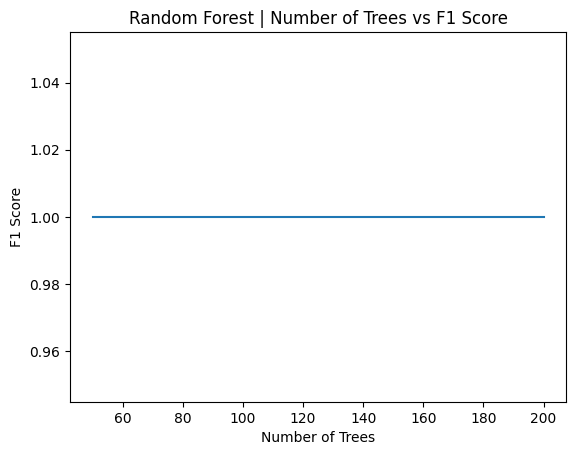

In [70]:
f1_df = pd.DataFrame(estimators, columns=['Number of Trees', 'F1 Score'])

ax = sns.lineplot(data=f1_df, x='Number of Trees', y='F1 Score')
ax.set_title('Random Forest | Number of Trees vs F1 Score')

#### Support Vector Classifier

In [79]:
C_values = list()
range_C_values = 100

for c in range(1, range_C_values+1):
    clf = SVC(kernel='linear', C=c*0.1, random_state=1)

    # Realizamos validación cruzada con K=10 y métrica F1-Score
    cv = cross_validation(clf, X_train_5, y_train_5, score_metric, K)
    f1_svc = np.mean(cv)
    C_values.append((c, f1_svc))

Text(0.5, 1.0, 'Support Vector Machine | C Values vs F1 Score')

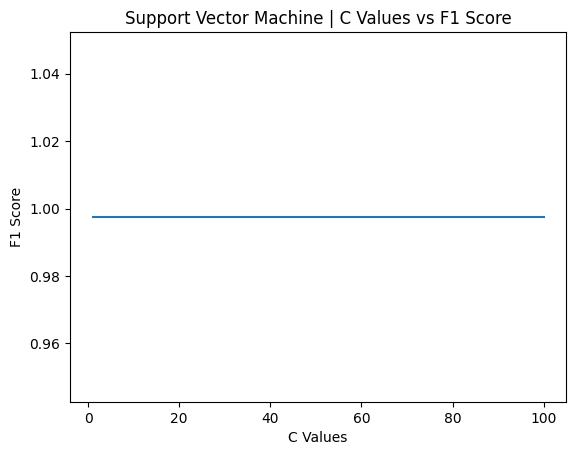

In [80]:
C_df = pd.DataFrame(C_values, columns=['C Values', 'F1 Score'])

ax = sns.lineplot(data=C_df, x='C Values', y='F1 Score')
ax.set_title('Support Vector Machine | C Values vs F1 Score')

Vemos que es independiente los parámetros de la cantidad de ajuste del modelo. Lo anterior se puede deber a que estemos ante una posible correlación entre alguno de los predictores y el target.

#### Ajuste en muestra test

Instanciamos nuestros modelos, los entrenamos y los probamos con la muestra test.

In [82]:
clf_svm.fit(X_train_5, y_train_5)
clf_rf.fit(X_train_5, y_train_5)
clf_nb.fit(X_train_5, y_train_5)

GaussianNB()

Generamos las predicciones

In [86]:
y_pred_svm = clf_svm.predict(X_test)
y_pred_rf = clf_rf.predict(X_test)
y_pred_nb = clf_nb.predict(X_test)

Analizamos las métricas de cada clasificador

In [87]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix
)

In [88]:
def print_metrics(y_test, y_pred):
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f'''
    Recall: {recall}
    Accuracy: {accuracy}
    Precision: {precision}
    F1 Score: {f1}
    AUC: {auc}''')

    display(confusion_matrix(y_test, y_pred))

#### Métricas SVC

In [89]:
print_metrics(y_test, y_pred_svm)


    Recall: 1.0
    Accuracy: 1.0
    Precision: 1.0
    F1 Score: 1.0
    AUC: 1.0


array([[161,   0],
       [  0,  10]])

#### Métricas Random Forest

In [90]:
print_metrics(y_test, y_pred_rf)


    Recall: 1.0
    Accuracy: 1.0
    Precision: 1.0
    F1 Score: 1.0
    AUC: 1.0


array([[161,   0],
       [  0,  10]])

#### Métricas Naive Bayes

In [91]:
print_metrics(y_test, y_pred_nb)


    Recall: 1.0
    Accuracy: 0.9941520467836257
    Precision: 0.9090909090909091
    F1 Score: 0.9523809523809523
    AUC: 0.9968944099378881


array([[160,   1],
       [  0,  10]])

Podemos ver que en los 3 clasificadores las predicciones son prácticamente perfectas. Este caso generalmente no es común que ocurre y ante todo, podría ser que estemos ante una situación en que la variable del target tenga colinealidad con alguno de los predictores. Con lo anterior, nos referimos a que el valor de alguno de los predictores puede influir determinísticamente en el valor 0 o 1 del target.

Para determinar los predictores más importantes, se podría consultar en el `Random Forest` las variables más utilizadas de los árboles que se generaron aleatoriamente y hacer un análisis sobre el peso que estas tenían para determinar una clase. En tal caso, es muy probable que veamos una o dos variables que sean las únicas necesarias para determinar la decisión de Hospitalizar.